In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns
from PIL import Image
from scipy import misc
from os import listdir
from os.path import isfile, join
from random import shuffle
from collections import Counter
from sklearn.manifold import TSNE
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
os.listdir('/content/drive/MyDrive/Plant_Dataset_Segmented')

['Abnormal', 'Healthy']

In [ ]:
Normal=os.listdir('/content/drive/MyDrive/Plant_Dataset_Segmented/Healthy')
Abnormal = os.listdir('/content/drive/MyDrive/Plant_Dataset_Segmented/Abnormal')

In [ ]:
data=np.concatenate([Normal, Abnormal])
len(data)==len(Normal)+len(Abnormal)

True

In [ ]:
target_w=np.full(len(Normal),0)
target_x=np.full(len(Abnormal),1)
data_target=np.concatenate([target_w, target_x])
len(data_target)==len(target_w)+len(target_x)

True

In [ ]:
len(data_target)==len(data)

True

In [ ]:
data_target

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
data

array(['5761a17a-0629-48cc-aa66-ffff745b5adb___JR_HL 8191.JPG',
       '57a30847-5cb6-4edd-acd9-85d9be5e0aad___JR_HL 8223.JPG',
       '573a1adf-4134-43f4-919c-939c0bb9a8da___JR_HL 7847.JPG', ...,
       'fe0f9f93-fb79-45fa-a195-6b85141ad2aa___NREC_B.Spot 9227.JPG',
       'ff7d08df-7fca-4a2e-a2f4-b196a19e6442___JR_B.Spot 3237.JPG',
       'ffa3b1df-49c6-4fd2-9ec5-1ca5eb175797___JR_B.Spot 3254.JPG'],
      dtype='<U66')

In [ ]:
Normal_values=os.listdir('/content/drive/MyDrive/Plant_Dataset_Segmented/Healthy')
Abnormal_values = os.listdir('/content/drive/MyDrive/Plant_Dataset_Segmented/Abnormal')

In [ ]:
X_data =[]
for file in Normal_values:
    img = cv2.imread('/content/drive/MyDrive/Plant_Dataset_Segmented/Healthy/'+file)
    face = cv2.resize(img,(224, 224))
    (b, g, r)=cv2.split(face)
    img=cv2.merge([r,g,b])
    X_data.append(img)

In [ ]:
for file in Abnormal_values:
    img = cv2.imread('/content/drive/MyDrive/Plant_Dataset_Segmented/Abnormal/'+file)
    face = cv2.resize(img,(224, 224))
    (b, g, r)=cv2.split(face)
    img=cv2.merge([r,g,b])
    X_data.append(img)

In [ ]:
len(X_data)==len(data)==len(data_target)

True

In [ ]:
X = np.squeeze(X_data)
X.shape

(2484, 224, 224, 3)

In [ ]:
# normalize data
X = X.astype('float32')
X /= 255

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Replace keras.utils.np_utils with tensorflow.keras.utils
from tensorflow.keras.utils import to_categorical

num_classes = 2
# Convert class labels to one-hot encoding
Y = to_categorical(data_target, num_classes)

# Shuffle the dataset
x, y = shuffle(X, Y, random_state=None)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=None)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.initializers import GlorotNormal
from tensorflow.keras.optimizers import
from tensorflow.keras.models import ModeAdaml
from tensorflow import keras

from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array
from keras.callbacks import ModelCheckpoint, EarlyStopping


model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3), kernel_initializer=GlorotNormal()))
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer=GlorotNormal()))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer=GlorotNormal()))
model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer=GlorotNormal()))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu', kernel_initializer=GlorotNormal()))
model.add(Conv2D(128, (3,3), activation='relu', kernel_initializer=GlorotNormal()))
model.add(MaxPooling2D(2,2))

model.add(GlobalAveragePooling2D())

model.add(Dense(256, activation='relu', kernel_initializer=GlorotNormal()))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu', kernel_initializer=GlorotNormal()))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu', kernel_initializer=GlorotNormal()))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Binary classification output
model.add(Dense(2, activation='softmax'))



# optimization
#optimizer = tf.keras.optimizers.RMSprop(
    #learning_rate=0.001,
    #rho=0.9,
    #momentum=0.0,
    #epsilon=1e-07,
    #centered=False,
    #name='RMSprop'
#)
#optimizer = tf.keras.optimizers.SGD(
    #learning_rate=0.01,
    #momentum=0.95,
    #nesterov=True,
    #name='SGD'
#)
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.0001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name='Adam',
)
#optimizer=tf.keras.optimizers.Adadelta(
    #learning_rate=0.001,
    #rho=0.95,
    #epsilon=1e-07,
    #name='Adadelta',
#)
#optimizer = tf.keras.optimizers.Adagrad(
    #learning_rate=0.001,
    #initial_accumulator_value=0.1,
    #epsilon=1e-07,
    #name='Adagrad',
#)
#optimizer = tf.keras.optimizers.Adamax(
    #learning_rate=0.001,
    #beta_1=0.9,
    #beta_2=0.999,
    #epsilon=1e-07,
    #name='Adamax',
#)
#optimizer = tf.keras.optimizers.Nadam(
    #learning_rate=0.001,
    #beta_1=0.9,
    #beta_2=0.999,
    #epsilon=1e-07,
    #name='Nadam',
#)
# Compile Model
model.compile(loss='categorical_crossentropy', optimizer=optimizer,metrics=["accuracy"])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 51, 51, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 49, 49, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 363,106 (1.39 MB)

 Trainable params: 362,210 (1.38 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
# Training
import time
tic= time.time()
hist = model.fit(X_train, y_train, batch_size=32, epochs=50, verbose=1, validation_data=(X_test, y_test))
toc=time.time()
print("vectorised version = " + str((toc-tic))+"s")

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 133ms/step - accuracy: 0.9615 - loss: 0.1023 - val_accuracy: 0.9557 - val_loss: 0.1146
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 125ms/step - accuracy: 0.9646 - loss: 0.0917 - val_accuracy: 0.9437 - val_loss: 0.1369
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 125ms/step - accuracy: 0.9405 - loss: 0.1425 - val_accuracy: 0.8793 - val_loss: 0.4269
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 125ms/step - accuracy: 0.9411 - loss: 0.1374 - val_accuracy: 0.8551 - val_loss: 0.4920
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - accuracy: 0.9184 - loss: 0.2070 - val_accuracy: 0.9839 - val_loss: 0.1057
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 127ms/step - accuracy: 0.9587 - loss: 0.1219 - val_accuracy: 0.9577 - val_loss: 0.1153
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 128ms/step - accuracy: 0.9581 - loss: 0.1032 - val_accuracy: 0.9839 - val_loss: 0.1015
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 126ms/step - accuracy: 0.9557 - loss: 0.1074 - val_accura

<Figure size 640x480 with 0 Axes>

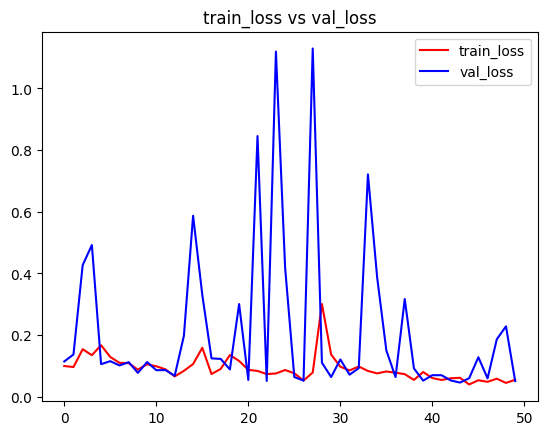

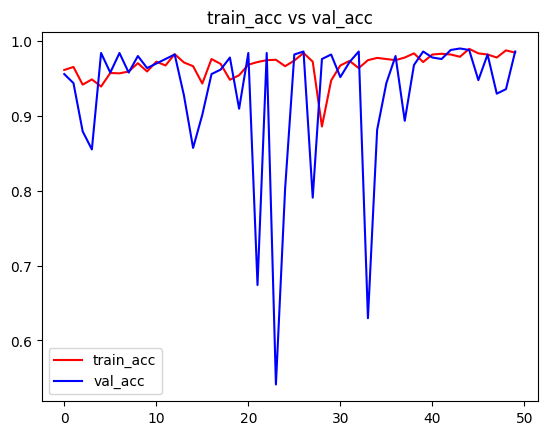

<Figure size 640x480 with 0 Axes>

In [ ]:
# visualizing losses and accuracy
%matplotlib inline

train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']

epochs = range(len(train_acc))

plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss')
plt.legend()
plt.figure()

plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_acc')
plt.title('train_acc vs val_acc')
plt.legend()
plt.figure()

In [ ]:
labels =["Normal",  # index 0
        "Abnormal", # index 1
        ]

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Test Loss: 0.05078373849391937
Test accuracy: 0.98591548204422


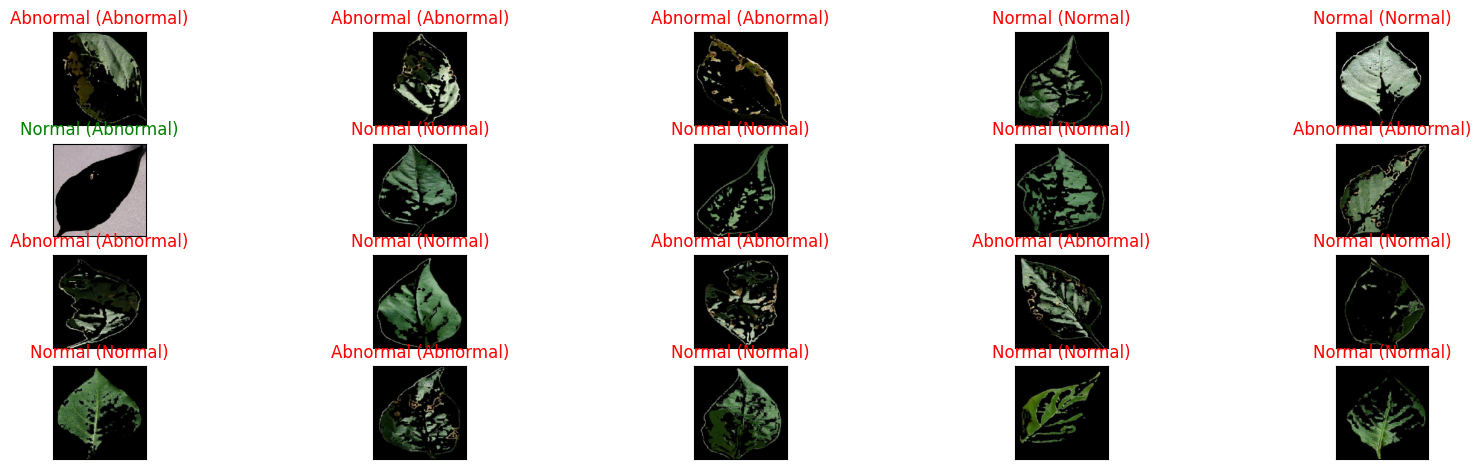

In [ ]:
y_hat = model.predict(X_test)
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])
# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 20))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=20, replace=False)):
    ax = figure.add_subplot(14, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index],
                                  labels[true_index]),
                                  color=("red" if predict_index == true_index else "green"))
plt.show()

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


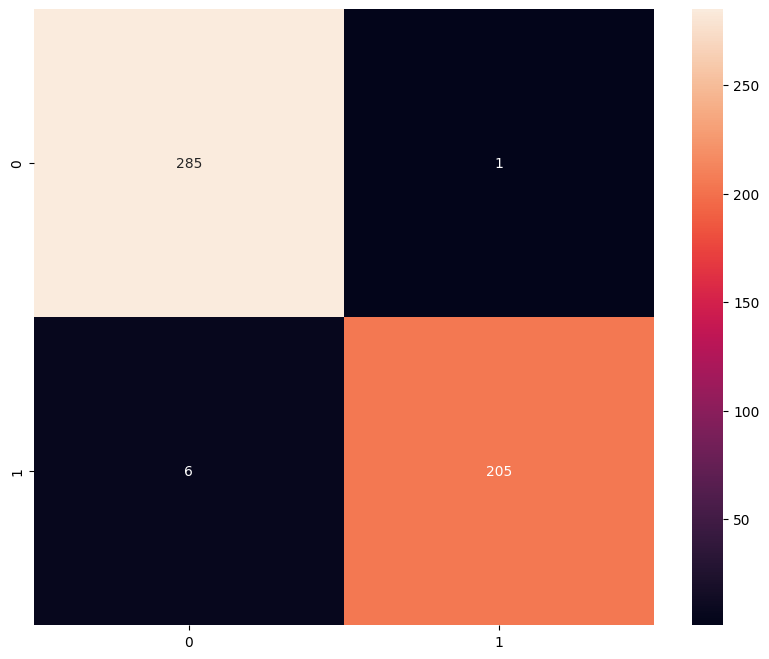

In [ ]:
from sklearn.metrics import confusion_matrix
Y_prediction = model.predict(X_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_prediction,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt="d");

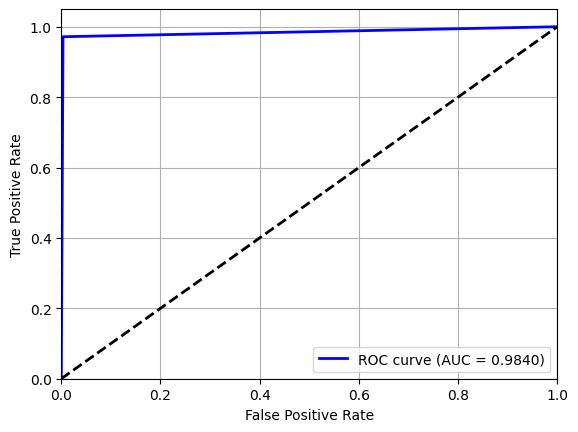

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Define the confusion matrix for Healthy and Abnormal
conf_matrix = np.array([[285, 1],  # tn: True Negatives (Healthy), fp: False Positives (Healthy classified as Abnormal)
                        [6, 205]]) # fn: False Negatives (Abnormal classified as Healthy), tp: True Positives (Abnormal)

# Number of classes (binary classification)
class_names = ['Healthy', 'Abnormal']

# Generate actual labels based on the confusion matrix
actual_labels = np.array([0] * (conf_matrix[0].sum()) + [1] * (conf_matrix[1].sum()))  # 0 for Healthy, 1 for Abnormal

# Generate predicted labels based on the confusion matrix
predicted_scores = np.array([0] * conf_matrix[0, 0] + [1] * conf_matrix[0, 1] +
                            [0] * conf_matrix[1, 0] + [1] * conf_matrix[1, 1])

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(actual_labels, predicted_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title(f'ROC Curve (AUC = {roc_auc:.4f})')
plt.legend(loc='lower right')
plt.grid(True)

# Display the plot
plt.show()

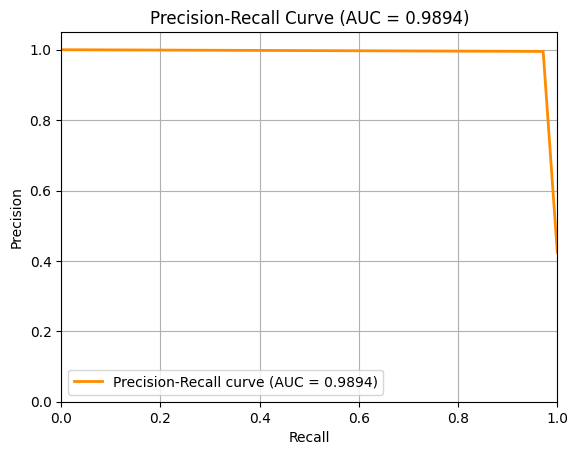

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# Define the confusion matrix for Healthy and Abnormal
conf_matrix = np.array([[285, 1],  # tn: True Negatives (Healthy), fp: False Positives (Healthy classified as Abnormal)
                        [6, 205]]) # fn: False Negatives (Abnormal classified as Healthy), tp: True Positives (Abnormal)

# Number of classes (binary classification)
class_names = ['Healthy', 'Abnormal']

# Actual labels (ground truth)
actual_labels = np.array([0] * (conf_matrix[0].sum()) + [1] * (conf_matrix[1].sum()))  # 0 for Healthy, 1 for Abnormal

# Predicted labels based on the confusion matrix
predicted_scores = np.array([0] * conf_matrix[0, 0] + [1] * conf_matrix[0, 1] +
                            [0] * conf_matrix[1, 0] + [1] * conf_matrix[1, 1])

# Compute precision-recall curve and AUC for binary classification
precision, recall, _ = precision_recall_curve(actual_labels, predicted_scores)
pr_auc = auc(recall, precision)

# Plot precision-recall curve
plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label=f'Precision-Recall curve (AUC = {pr_auc:.4f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (AUC = {pr_auc:.4f})')
plt.legend(loc='lower left')
plt.grid(True)

# Display the plot
plt.show()
